In [1]:
import jax
jax.config.update("jax_enable_x64", True)
from bulirsch import * 
from scipy.special import ellipe, ellipk
import matplotlib.pyplot as plt
import numpy as np
from scipy.integrate import quad

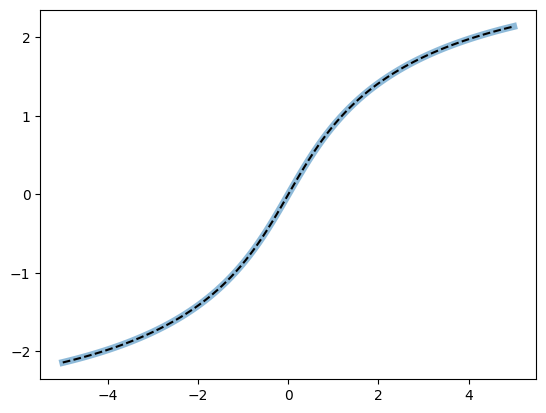

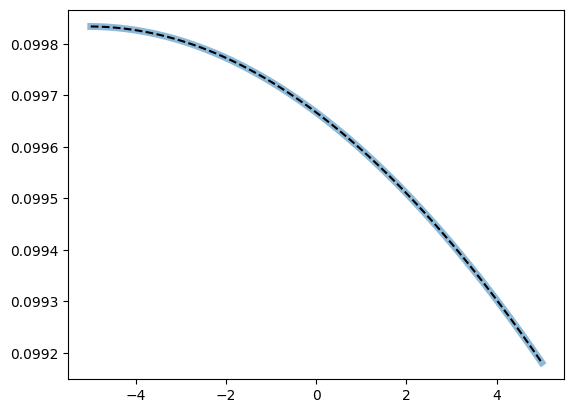

In [3]:
def el1_numerical(x, kc):

    func = lambda y: np.sqrt(1 / (np.cos(y)**2 + kc**2 * np.sin(y)**2))
    return quad(func, 0, np.arctan(x))[0]

x = np.linspace(-5, 5, 100)
plt.plot(x, np.vectorize(el1_numerical)(x, 0.2), '-', alpha=0.5, linewidth=5)
plt.plot(x, el1(x, 0.2), 'k--')

plt.figure()
kc = np.linspace(0.01, 2, 100)
plt.plot(x, np.vectorize(el1_numerical)(0.1, kc), '-', alpha=0.5, linewidth=5)
plt.plot(x, el1(0.1, kc), 'k--')

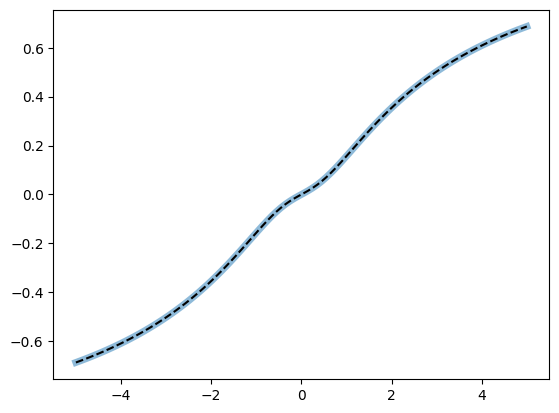

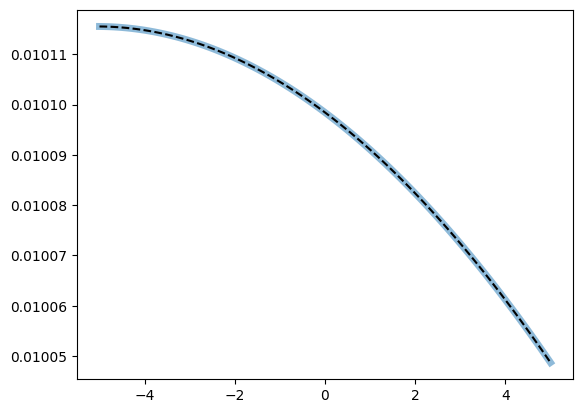

In [4]:
def el2_numerical(x, kc, a, b):

    func = lambda y: ((a + b * np.tan(y)**2) 
                      / jnp.sqrt(
                          (1 + np.tan(y)**2) 
                          * (1 + kc**2 * np.tan(y)**2)
                      )
                     )
    
    return quad(func, 0, np.arctan(x))[0]

x = np.linspace(-5, 5, 100)
plt.plot(x, np.vectorize(el2_numerical)(x, 0.2, 0.1, 0.5), '-', alpha=0.5, linewidth=5)
plt.plot(x, el2(x, 0.2, 0.1, 0.5), 'k--')

plt.figure()
kc = np.linspace(0.01, 2, 100)
plt.plot(x, np.vectorize(el2_numerical)(0.1, kc, 0.1, 0.5), '-', alpha=0.5, linewidth=5)
plt.plot(x, el2(0.1, kc, 0.1, 0.5), 'k--')

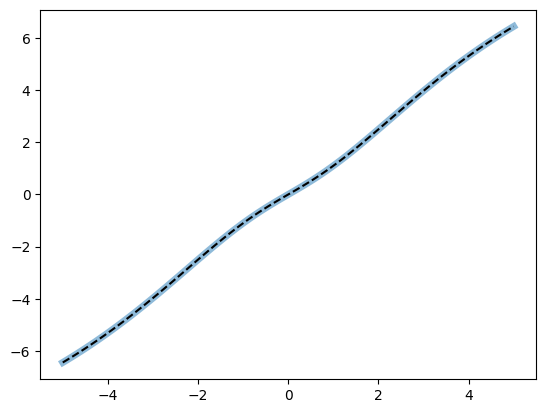

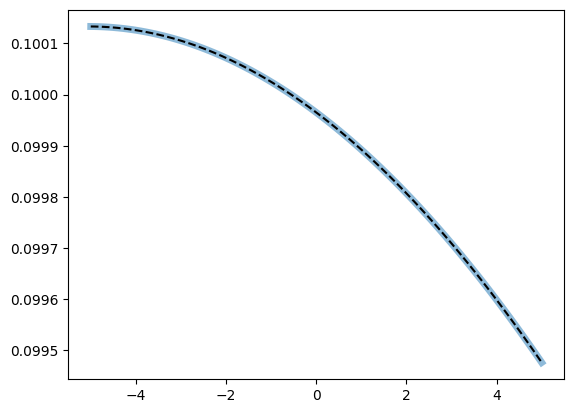

In [5]:
def el3_numerical(x, kc, p):

    func = lambda y: (
        1 / (np.cos(y)**2 + p * np.sin(y)**2) 
        / np.sqrt(np.cos(y)**2 + kc * kc * np.sin(y)**2)
    )
    
    return quad(func, 0, np.arctan(x))[0]

x = np.linspace(-5, 5, 100)
plt.plot(x, np.vectorize(el3_numerical)(x, 0.2, 0.1), '-', alpha=0.5, linewidth=5)
plt.plot(x, el3(x, 0.2, 0.1), 'k--')

plt.figure()
kc = np.linspace(0.01, 2, 100)
plt.plot(x, np.vectorize(el3_numerical)(0.1, kc, 0.1), '-', alpha=0.5, linewidth=5)
plt.plot(x, el3(0.1, kc, 0.1), 'k--')

/var/folders/dc/b802gvz91_q_5p71n099w8d40000gn/T/ipykernel_25007/1685869851.py:8: IntegrationWarning: The integral is probably divergent, or slowly convergent.
  return quad(func, 0, np.pi / 2)[0]


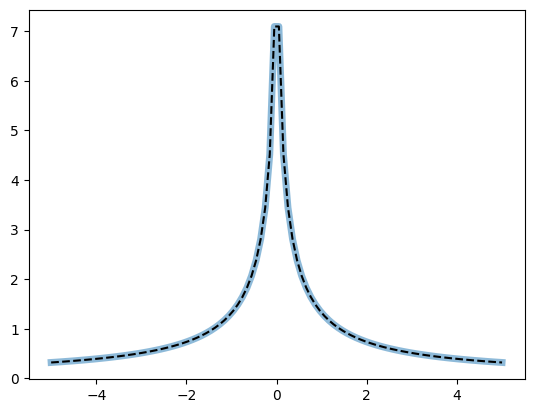

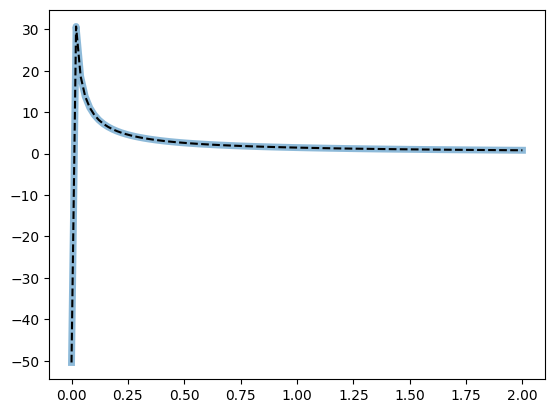

In [6]:
def cel_numerical(kc, p, a, b):

    func = lambda y: (
        (a * np.cos(y)**2 + b * np.sin(y)**2) / (np.cos(y)**2 + p * np.sin(y)**2)
        / np.sqrt(np.cos(y)**2 + kc**2 * np.sin(y)**2)
    )

    return quad(func, 0, np.pi / 2)[0]

x = np.linspace(-5, 5, 100)
plt.plot(x, np.vectorize(cel_numerical)(x, 0.2, 0.1, 0.5), '-', alpha=0.5, linewidth=5)
plt.plot(x, cel(x, 0.2, 0.1, 0.5), 'k--')

plt.figure()
kc = np.linspace(0, 2, 100)
plt.plot(kc, np.vectorize(cel_numerical)(0.1, kc, 0.1, 0.5), '-', alpha=0.5, linewidth=5)
plt.plot(kc, cel(0.1, kc, 0.1, 0.5), 'k--')

94 µs ± 704 ns per loop (mean ± std. dev. of 7 runs, 10,000 loops each)
128 µs ± 8.66 µs per loop (mean ± std. dev. of 7 runs, 10,000 loops each)


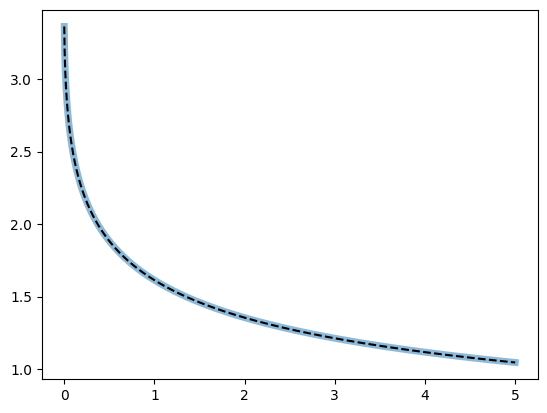

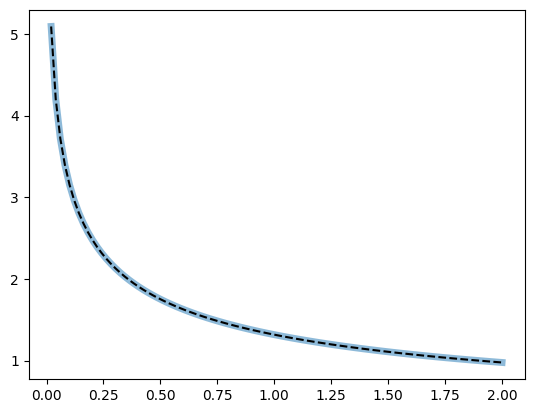

In [35]:
x = np.linspace(-5, 5, 5000)
%timeit elliprc(x, 0.2)
rc(x, 0.2)
%timeit rc(x, 0.2)
plt.plot(x, elliprc(x, 0.2), '-', alpha=0.5, linewidth=5)
plt.plot(x, rc(x, 0.2), 'k--')

plt.figure()
x = np.linspace(0, 2, 100)
plt.plot(kc, elliprc(0.1, x), '-', alpha=0.5, linewidth=5)
plt.plot(kc, rc(0.1, x), 'k--')

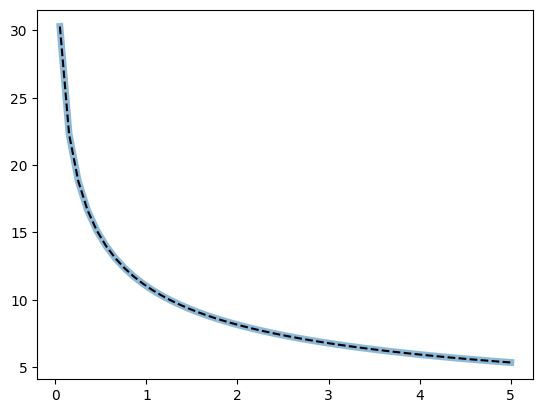

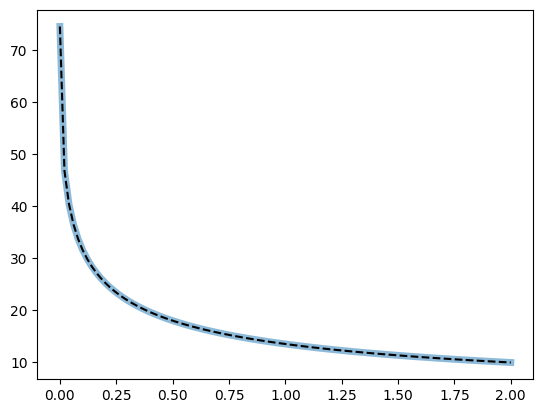

In [18]:
x = np.linspace(-5, 5, 100)
plt.plot(x, elliprd(x, 0.2, 0.1), '-', alpha=0.5, linewidth=5)
plt.plot(x, rd(x, 0.2, 0.1), 'k--')

plt.figure()
x = np.linspace(0, 2, 100)
plt.plot(kc, elliprd(0.1, x, 0.1), '-', alpha=0.5, linewidth=5)
plt.plot(kc, rd(0.1, x, 0.1), 'k--')

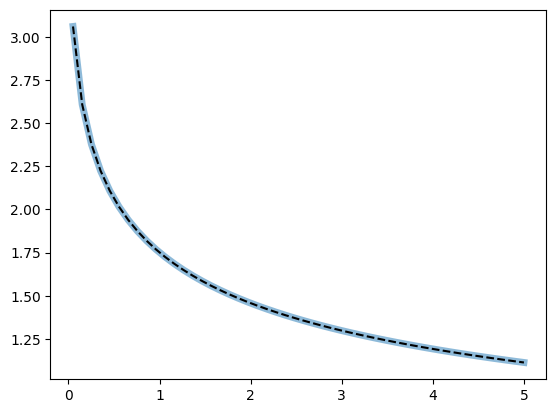

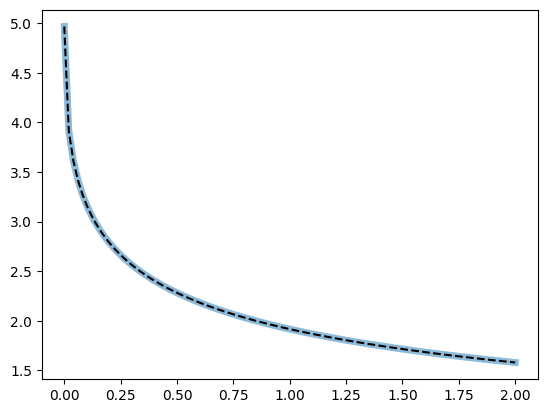

In [19]:
x = np.linspace(-5, 5, 100)
plt.plot(x, elliprf(x, 0.2, 0.1), '-', alpha=0.5, linewidth=5)
plt.plot(x, rf(x, 0.2, 0.1), 'k--')

plt.figure()
x = np.linspace(0, 2, 100)
plt.plot(kc, elliprf(0.1, x, 0.1), '-', alpha=0.5, linewidth=5)
plt.plot(kc, rf(0.1, x, 0.1), 'k--')

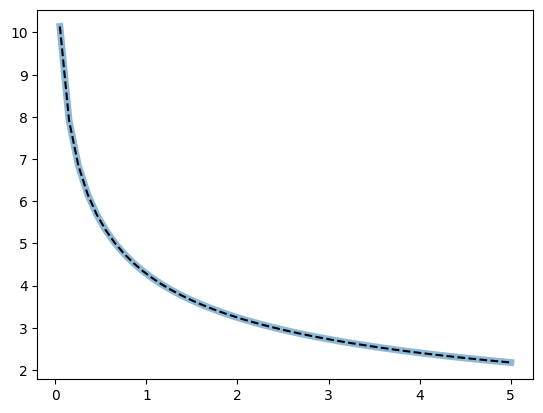

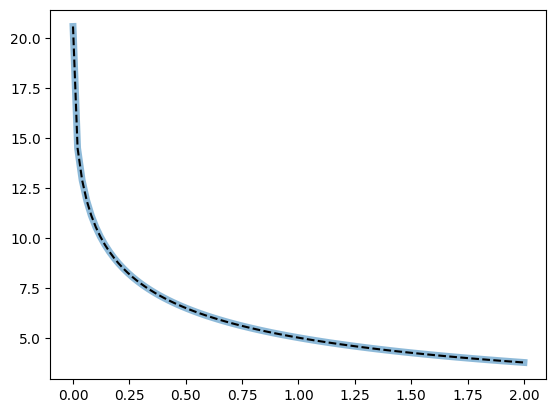

In [21]:
x = np.linspace(-5, 5, 100)
plt.plot(x, elliprj(x, 0.2, 0.1, 0.5), '-', alpha=0.5, linewidth=5)
plt.plot(x, rj(x, 0.2, 0.1, 0.5), 'k--')

plt.figure()
x = np.linspace(0, 2, 100)
plt.plot(kc, elliprj(0.1, x, 0.1, 0.5), '-', alpha=0.5, linewidth=5)
plt.plot(kc, rj(0.1, x, 0.1, 0.5), 'k--')